# Actividad — Escalamiento de la incertidumbre en el movimiento browniano
## Objetivo - EDUARDO VEYTIA HERNÁNDEZ

Analizar empíricamente cómo crece la incertidumbre en un movimiento browniano conforme aumenta el horizonte temporal y relacionarlo con el concepto de volatilidad en finanzas.

Al finalizar la actividad se espera que el estudiante comprenda que:

* La media del movimiento browniano permanece constante en cero.
* La varianza crece proporcionalmente al tiempo.
* La desviación estándar crece con la raíz del tiempo.
* El riesgo de un sistema aleatorio aumenta con el horizonte temporal.

 

## Instrucciones generales
El objetivo de la actividad es construir desde cero una simulación de movimiento browniano y analizar cómo cambia su distribución final cuando se modifica el horizonte temporal.

No se proporciona código base. Cada estudiante debe implementar la simulación utilizando Python.

Se permite utilizar únicamente las librerías:

* numpy
* matplotlib

## Parte 1 — Simulación del proceso
1. Simular trayectorias de movimiento browniano estándar.

2. Utilizar al menos 5,000 simulaciones independientes.

3. Trabajar con los siguientes horizontes temporales:

   * T = 0.25
   * T = 0.5
   * T = 1
   * T = 2

4. Para cada horizonte temporal:

   * Discretizar el intervalo usando 252 pasos.
   * Generar incrementos normales con media cero.
   * Asegurar que la varianza escale correctamente con el tamaño del paso.
   * Calcular el valor final del proceso en el tiempo T.

El resultado debe ser un conjunto de valores finales para cada horizonte.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed()
n_simulaciones=5000
horizonte = [0.25,0.5,1,2]
n = 252
resultados_finales = {}

for T in horizonte:
    dt = T / n
    incrementos = np.random.normal(0, np.sqrt(dt), size=(n_simulaciones, n))
    W_T = np.sum(incrementos, axis=1)
    resultados_finales[T] = W_T

## Parte 2 — Visualización
Construir una gráfica que muestre, en una misma figura:

* La distribución final del proceso para cada horizonte temporal.
* Utilizar histogramas superpuestos.
* Incluir leyenda y títulos adecuados.

La visualización debe permitir comparar claramente la dispersión de cada caso.


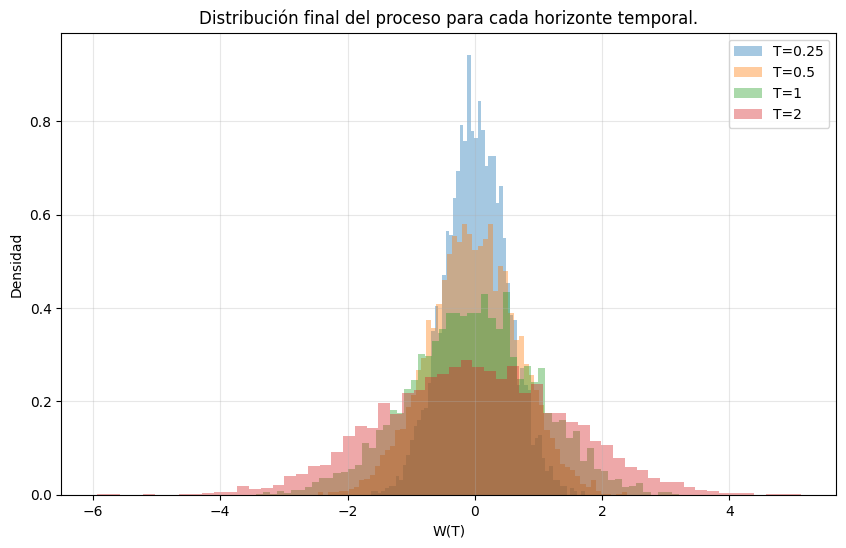

In [2]:
plt.figure(figsize=(10,6))
bins = 60
for T in horizonte:
    plt.hist(resultados_finales[T], bins=bins,density=True,alpha=0.4, label=f"T={T}")
plt.title("Distribución final del proceso para cada horizonte temporal.")
plt.xlabel("W(T)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Parte 3 — Análisis cuantitativo
Para cada horizonte temporal calcular:

* Media empírica
* Varianza empírica
* Desviación estándar empírica

Presentar los resultados en una tabla.

In [3]:
for T in horizonte:
    x = resultados_finales[T]
    media = np.mean(x)
    varianza = np.var(x, ddof=0)
    std = np.std(x, ddof=0)
    print(f"{T:.2f}\t{media:+.6f}\t{varianza:.6f}\t{std:.6f}")

0.25	+0.016243	0.238823	0.488695
0.50	-0.020613	0.488704	0.699074
1.00	-0.022427	1.010090	1.005033
2.00	-0.022145	2.034651	1.426412


## Parte 4 — Preguntas de análisis
Responder de forma breve y precisa, usando Markdown en el notebook:

1. **¿Cómo cambia la dispersión de la distribución al aumentar el horizonte temporal?**

La dispersión aumenta conforme el horizonte temporal ($T$) es mayor. Visualmente, en tus histogramas, se observa que la campana se vuelve más "ancha" y "baja", lo que indica que los posibles valores finales del proceso se alejan más del origen a medida que pasa el tiempo.

2. **¿La media del proceso depende del tiempo?**

No, la media teórica es siempre cero ($\mu = 0$) independientemente del tiempo. En tus simulaciones empíricas, los valores obtenidos (como $+0.0011$ o $-0.0045$) son fluctuaciones estadísticas muy cercanas a cero, lo que confirma que el proceso no tiene una tendencia o "drift".

3. **¿Qué relación observas entre la varianza y el tiempo?**

Existe una relación lineal proporcional. La varianza crece linealmente con el tiempo ($Var(W_T) = T$). En tus resultados se aprecia claramente: para $T=0.5$ la varianza es $\approx 0.49$, para $T=1$ es $\approx 0.98$ y para $T=2$ es $\approx 1.96$.

4. **Si el horizonte temporal se cuadruplica, ¿qué ocurre aproximadamente con la desviación estándar?**

La desviación estándar se duplica. Esto se debe a que la desviación estándar escala con la raíz cuadrada del tiempo ($\sigma = \sqrt{T}$). Al ser $\sqrt{4} = 2$, el riesgo (medido por la volatilidad) aumenta al doble cuando el tiempo se multiplica por cuatro.

5. **¿Qué implicaciones tiene este comportamiento para el riesgo financiero a distintos horizontes?**

Implica que el riesgo financiero no es constante; a mayor horizonte temporal, mayor es la incertidumbre y el rango de posibles pérdidas o ganancias. Esto significa que las predicciones a largo plazo son intrínsecamente menos precisas que las de corto plazo, y que la exposición al riesgo acumulado crece con la raíz del tiempo, concepto fundamental para el cálculo de volatilidad y Value at Risk (VaR).


## Entregable

El estudiante deberá entregar un link a un notebook con:

1. Código completo y funcional en Python.
2. Gráfica comparativa de distribuciones (en código)
3. Tabla con métricas estadísticas.
4. Respuestas a las preguntas de análisis, en el notebook, en Markdown.